             crim        zn     indus       nox        rm       age       dis  \
crim     1.000000 -0.200469  0.406583  0.420972 -0.219247  0.352734 -0.379670   
zn      -0.200469  1.000000 -0.533828 -0.516604  0.311991 -0.569537  0.664408   
indus    0.406583 -0.533828  1.000000  0.763651 -0.391676  0.644779 -0.708027   
nox      0.420972 -0.516604  0.763651  1.000000 -0.302188  0.731470 -0.769230   
rm      -0.219247  0.311991 -0.391676 -0.302188  1.000000 -0.240265  0.205246   
age      0.352734 -0.569537  0.644779  0.731470 -0.240265  1.000000 -0.747881   
dis     -0.379670  0.664408 -0.708027 -0.769230  0.205246 -0.747881  1.000000   
rad      0.625505 -0.311948  0.595129  0.611441 -0.209847  0.456022 -0.494588   
tax      0.582764 -0.314563  0.720760  0.668023 -0.292048  0.506456 -0.534432   
ptratio  0.289946 -0.391679  0.383248  0.188933 -0.355501  0.261515 -0.232471   
b       -0.385064  0.175520 -0.356977 -0.380051  0.128069 -0.273534  0.291512   
lstat    0.455621 -0.412995 

<AxesSubplot:>

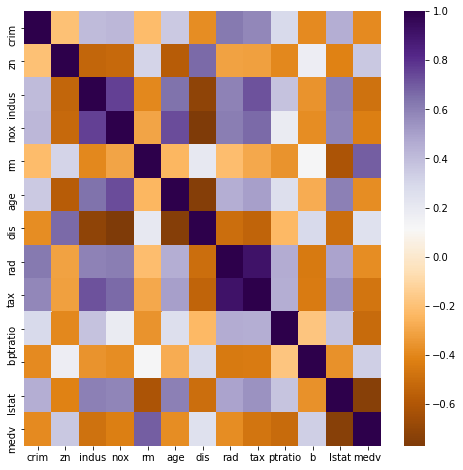

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr as r_coef

df = pd.read_csv("BostonHousing.csv", delimiter=",")

# Usunięcie ze zbioru kolumnę chas
df = df.drop(labels=["chas"], axis='columns')

# Podział zbioru na treningowy i testowy oraz standaryzacja kolumn
x = df.iloc[:,:-1]
y = df.iloc[:,12]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Macierz korelacji
corr_matrix=df.corr()
# W postaci ramki danych
print(pd.DataFrame(corr_matrix))
# W postaci heatmapy
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, cmap='PuOr')

In [6]:
## Modelling
# Regresja z użyciem modelu liniowego
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Zmienne z najlepszym parametrem liniowym
coeff = [round(c, 3) for c in model.coef_]
named_coeff = list(zip(df.keys(), coeff))
named_coeff.sort(reverse=True, key=lambda x: x[1])
print("Najwyższa wartość parametru liniowego dla zmiennych:", named_coeff[:3])
named_coeff = pd.DataFrame(named_coeff, columns=["name", "coeff"])

Najwyższa wartość parametru liniowego dla zmiennych: [('rm', 2.64), ('rad', 2.274), ('zn', 1.038)]


In [7]:
# ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3))
ann.add(tf.keras.layers.Dense(units=3))
ann.add(tf.keras.layers.Dense(units=3))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 417us/step - loss: 594.1558
Epoch 2/100
12/12 [==============================] - 0s 833us/step - loss: 589.0797
Epoch 3/100
12/12 [==============================] - 0s 833us/step - loss: 583.8383
Epoch 4/100
12/12 [==============================] - 0s 834us/step - loss: 577.9740
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 571.4740
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 563.9379
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 556.1455
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 546.6912
Epoch 9/100
12/12 [==============================] - 0s 759us/step - loss: 537.6160
Epoch 10/100
12/12 [==============================] - 0s 833us/step - loss: 526.6279
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 515.9897
Epoch 12/100
12/12 [==============================] - 0s 833us/step - loss: 503.8358

In [8]:
ann_pred = ann.predict(x_test)

# Zadanie 3
from sklearn.metrics import r2_score
print("Wartośc współczynnika R^2 dla regresji liniowej ",round(r2_score(y_test, y_pred), 3),
      " oraz sieci neuronowej ",round(r2_score(y_test, ann_pred), 3))

Wartośc współczynnika R^2 dla regresji liniowej  0.627  oraz sieci neuronowej  0.615


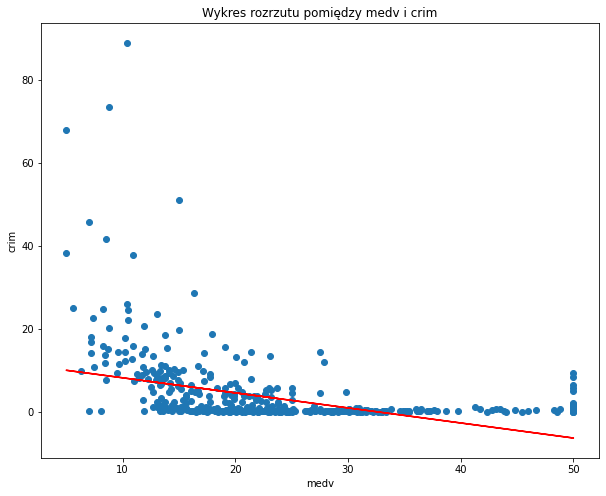

In [9]:
## Wizualizacja
# Wykres rozrzutu pomiędzy medv i crim
plt.figure(figsize=(10, 8))
plt.scatter(x=df['medv'], y=df['crim'])
plt.xlabel("medv")
plt.ylabel("crim")
plt.title("Wykres rozrzutu pomiędzy medv i crim")
z = np.polyfit(df['medv'], df['crim'], 1)
p = np.poly1d(z)
plt.plot(df['medv'],p(df['medv']),"r")
plt.show()

In [10]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = JupyterDash(__name__)

colors = {
    'background': '#111111',
    'text': '#ffffff'
}

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Wizualizacja',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Dashboard', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
    html.Label('Dropdown'),
    dcc.Dropdown(
        id='graph_type',
        options=[
            {'label': 'Wykres słupkowy dla parametrów z modelu liniowego', 'value': 'barplot'},
            {'label': 'Histogram', 'value': 'hist'},
            {'label': 'Wykres rozrzutu', 'value': 'scatterplot'}
        ],
        value='barplot'
    ),

    dcc.Graph(id='graph')
])

@app.callback(
    Output('graph', 'figure'),
    Input('graph_type', 'value'))

def update_graph(graph_type):
    
    barplot = px.bar(named_coeff, x="name", y="coeff")

    barplot.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )
    
    hist = px.histogram(df, x="medv")
    hist.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )
    
    scatterplot = px.scatter(df, x="rad", y="tax")
    scatterplot.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )
    
    if graph_type=='barplot':
        return barplot
    elif graph_type=='hist':
        return hist
    else:
        return scatterplot
    

if __name__ == '__main__':
    app.run_server(mode='inline', debug=True)